In [3]:
import zipfile
with zipfile.ZipFile('data/mnist.zip', 'r') as zipf:
    zipf.extractall(path='data/mnist_extracted')

In [2]:
import os

In [82]:
import re
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
%%time
label=[]
target=[]
file= (r"C:\Users\Abinay Rachakonda\Desktop\minst\data\mnist_extracted\New folder")
os.listdir(file)
for files in os.listdir(file):
    for file_1 in os.listdir(os.path.join(file,files)):
        file_2=os.path.join(os.path.join(file,files),file_1)
        img=Image.open(file_2)
        img1=img.resize((8,8))
        img2=np.array(img1).ravel()
        label.append(img2)
        target.append(files)

CPU times: total: 1min 24s
Wall time: 34min 27s


In [22]:
os.listdir(file)

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [25]:
df = pd.DataFrame(label,columns=["pixel"+ str(i) for i in range(0,64)])

In [26]:
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,15,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,24,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,...,29,0,0,0,0,0,0,0,0,0


In [27]:
df["label"] = target

In [28]:
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,A
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,A
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,A
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A


In [29]:
df.to_csv(' Recognising Handwritten Alphabets.csv')

In [32]:
df.shape

(372451, 65)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372451 entries, 0 to 372450
Data columns (total 65 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   pixel0   372451 non-null  uint8 
 1   pixel1   372451 non-null  uint8 
 2   pixel2   372451 non-null  uint8 
 3   pixel3   372451 non-null  uint8 
 4   pixel4   372451 non-null  uint8 
 5   pixel5   372451 non-null  uint8 
 6   pixel6   372451 non-null  uint8 
 7   pixel7   372451 non-null  uint8 
 8   pixel8   372451 non-null  uint8 
 9   pixel9   372451 non-null  uint8 
 10  pixel10  372451 non-null  uint8 
 11  pixel11  372451 non-null  uint8 
 12  pixel12  372451 non-null  uint8 
 13  pixel13  372451 non-null  uint8 
 14  pixel14  372451 non-null  uint8 
 15  pixel15  372451 non-null  uint8 
 16  pixel16  372451 non-null  uint8 
 17  pixel17  372451 non-null  uint8 
 18  pixel18  372451 non-null  uint8 
 19  pixel19  372451 non-null  uint8 
 20  pixel20  372451 non-null  uint8 
 21  pixel21  3

In [31]:
df['label'].value_counts()

O    57825
S    48419
U    29008
C    23409
T    22495
P    19341
N    19010
A    13870
M    12336
L    11586
R    11566
E    11440
Y    10859
W    10784
D    10134
B     8668
J     8493
H     7218
X     6272
Z     6076
Q     5812
G     5762
K     5603
V     4182
F     1163
I     1120
Name: label, dtype: int64

In [33]:
x=df.drop("label",axis=1)
y=df["label"]

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

In [42]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

C:\Users\Abinay Rachakonda\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, recall_score,classification_report

In [45]:
y_pred_logistic=classifier.predict(X_test)
y_pred_logistic

array(['O', 'U', 'E', ..., 'A', 'T', 'S'], dtype=object)

In [47]:
accuracy_score(y_test,y_pred_logistic)

0.851050690914298

<AxesSubplot:xlabel='label', ylabel='Count'>

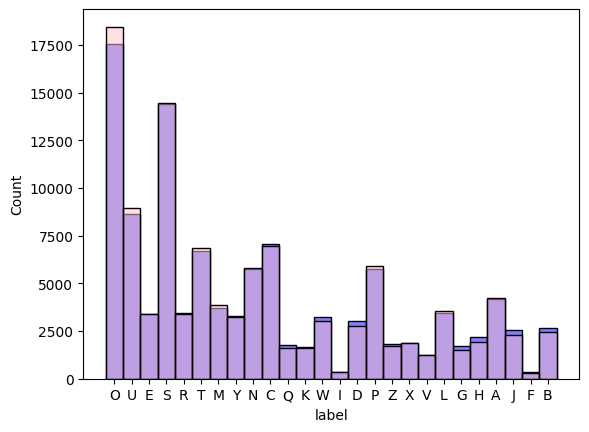

In [135]:
sns.histplot(y_test,color='blue',alpha=0.5)
sns.histplot(y_pred_logistic,color='pink',alpha=0.5)

In [46]:
confusion_matrix(y_test,y_pred_logistic)

array([[ 3435,    18,     1,     9,    22,     0,     8,   106,     0,
            1,    29,     3,   128,    93,    34,    68,    19,    53,
           21,     1,    43,     6,     8,    48,    43,     7],
       [   28,  1959,     8,    41,   105,     0,     5,    16,     0,
           20,     1,     0,    24,    16,   119,     7,     3,    34,
          168,     1,    38,     0,     3,    11,    20,    29],
       [    1,    19,  6182,     0,   101,     1,    68,     3,     3,
            9,    20,    58,     1,    47,   269,    52,     4,    36,
           63,    13,    79,     0,     4,     1,    13,     1],
       [    9,    32,     0,  2225,    12,     0,     0,     2,     0,
           27,     1,     4,    28,     4,   486,    29,     7,     2,
           66,     1,    36,     1,     3,     6,     5,    19],
       [   18,    54,   262,     9,  2443,     6,    36,    12,     0,
           19,    58,    39,     0,    22,    37,    15,     3,   124,
          100,     1,    67,  

In [48]:
print(classification_report(y_test,y_pred_logistic))

              precision    recall  f1-score   support

           A       0.81      0.82      0.81      4204
           B       0.81      0.74      0.77      2656
           C       0.89      0.88      0.88      7048
           D       0.81      0.74      0.77      3005
           E       0.72      0.72      0.72      3402
           F       0.90      0.79      0.84       351
           G       0.80      0.70      0.74      1737
           H       0.72      0.64      0.68      2172
           I       0.78      0.79      0.79       350
           J       0.73      0.66      0.70      2538
           K       0.75      0.72      0.73      1650
           L       0.91      0.93      0.92      3459
           M       0.84      0.88      0.86      3694
           N       0.77      0.78      0.77      5760
           O       0.91      0.96      0.93     17569
           P       0.88      0.91      0.89      5744
           Q       0.82      0.73      0.78      1794
           R       0.77    

In [50]:
from sklearn.tree import DecisionTreeClassifier
TreeClassifier=DecisionTreeClassifier()
TreeClassifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [55]:
y_pred_dt=TreeClassifier.predict(X_test)
y_pred_dt

array(['O', 'U', 'T', ..., 'A', 'Y', 'S'], dtype=object)

In [63]:
accuracy_score(y_test,y_pred_dt)

0.9451653898474977

<AxesSubplot:xlabel='label', ylabel='Count'>

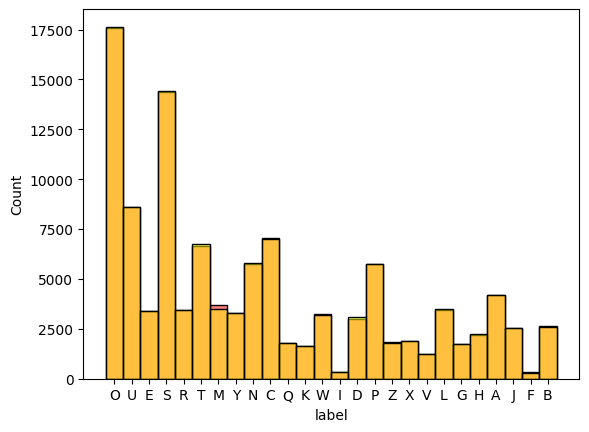

In [134]:
sns.histplot(y_test,color='red',alpha=0.5)
sns.histplot(y_pred_dt,color='yellow',alpha=0.5)

In [56]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           A       0.93      0.92      0.93      4204
           B       0.88      0.86      0.87      2656
           C       0.96      0.96      0.96      7048
           D       0.89      0.91      0.90      3005
           E       0.89      0.90      0.89      3402
           F       0.92      0.81      0.87       351
           G       0.88      0.88      0.88      1737
           H       0.87      0.89      0.88      2172
           I       0.85      0.82      0.84       350
           J       0.93      0.93      0.93      2538
           K       0.90      0.89      0.89      1650
           L       0.96      0.97      0.97      3459
           M       0.93      0.88      0.90      3694
           N       0.93      0.93      0.93      5760
           O       0.98      0.98      0.98     17569
           P       0.97      0.97      0.97      5744
           Q       0.89      0.88      0.89      1794
           R       0.91    

In [57]:
confusion_matrix(y_test,y_pred_dt)

array([[ 3886,    19,     2,    15,     7,     0,     5,    29,     0,
            5,     7,    10,    46,    33,    11,     9,    12,    63,
            8,     3,    12,     0,     5,    11,     1,     5],
       [   27,  2292,     6,    40,    41,     1,    31,     3,     0,
            7,     3,     1,     2,     8,    55,     5,     1,    27,
           72,     4,    12,     0,     4,     2,     3,     9],
       [    4,    22,  6769,     6,    54,     2,    17,     4,     0,
            8,     4,    41,     6,     4,    19,     9,     8,    20,
           24,     5,    10,     0,     4,     2,     2,     4],
       [   10,    27,     4,  2744,     9,     0,     2,     0,     0,
            7,     0,     4,     6,     4,   122,    17,     2,     1,
           15,     3,    11,     0,     7,     2,     4,     4],
       [    5,    34,    57,    11,  3047,     9,    30,     8,     5,
           11,    20,    13,     0,     6,    25,     5,    11,    34,
           37,     3,     0,  

In [59]:
from sklearn.neighbors import KNeighborsClassifier
KN_Classifier=KNeighborsClassifier()
KN_Classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [61]:
y_pred_knc=KN_Classifier.predict(X_test)
y_pred_knc

array(['O', 'U', 'E', ..., 'A', 'Y', 'S'], dtype=object)

In [62]:
accuracy_score(y_test,y_pred_knc)

0.9649352044103959

In [64]:
print(classification_report(y_test,y_pred_knc))

              precision    recall  f1-score   support

           A       0.93      0.98      0.95      4204
           B       0.95      0.93      0.94      2656
           C       0.97      0.98      0.97      7048
           D       0.92      0.87      0.90      3005
           E       0.95      0.93      0.94      3402
           F       0.98      0.90      0.94       351
           G       0.96      0.89      0.92      1737
           H       0.89      0.91      0.90      2172
           I       0.98      0.91      0.94       350
           J       0.95      0.93      0.94      2538
           K       0.94      0.92      0.93      1650
           L       0.96      0.98      0.97      3459
           M       0.97      0.96      0.97      3694
           N       0.95      0.96      0.96      5760
           O       0.96      0.99      0.98     17569
           P       0.96      0.98      0.97      5744
           Q       0.96      0.89      0.92      1794
           R       0.97    

In [65]:
from sklearn.ensemble import RandomForestClassifier
RF_Classifier=RandomForestClassifier()
RF_Classifier.fit(X_train,y_train)

RandomForestClassifier()

In [66]:
y_pred_rfc=RF_Classifier.predict(X_test)
y_pred_rfc

array(['O', 'U', 'E', ..., 'A', 'Y', 'S'], dtype=object)

In [67]:
accuracy_score(y_test,y_pred_rfc)


0.981563685830887

<AxesSubplot:xlabel='label', ylabel='Count'>

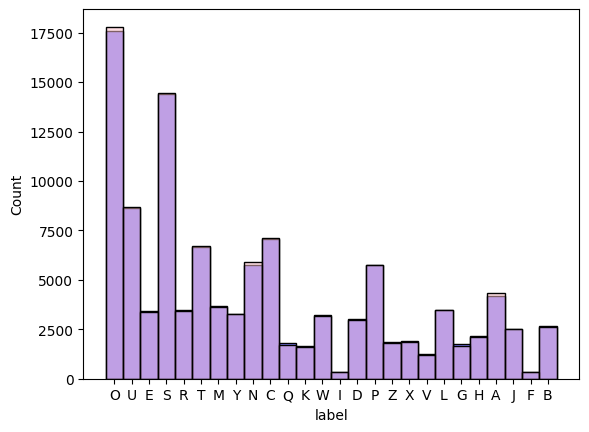

In [120]:
sns.histplot(y_test,color='blue',alpha=0.5)
sns.histplot(y_pred_rfc,color='pink',alpha=0.5)


In [68]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           A       0.96      0.99      0.97      4204
           B       0.97      0.95      0.96      2656
           C       0.98      0.99      0.99      7048
           D       0.97      0.95      0.96      3005
           E       0.97      0.96      0.97      3402
           F       1.00      0.92      0.96       351
           G       0.98      0.95      0.96      1737
           H       0.97      0.93      0.95      2172
           I       1.00      0.91      0.95       350
           J       0.98      0.97      0.97      2538
           K       0.97      0.96      0.96      1650
           L       0.99      0.99      0.99      3459
           M       0.98      0.96      0.97      3694
           N       0.96      0.98      0.97      5760
           O       0.98      1.00      0.99     17569
           P       0.99      0.99      0.99      5744
           Q       0.98      0.94      0.96      1794
           R       0.98    

In [69]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()
abc.fit(X_train,y_train)

AdaBoostClassifier()

In [70]:
y_pred_abc=abc.predict(X_test)
y_pred_abc

array(['O', 'U', 'O', ..., 'A', 'T', 'S'], dtype=object)

In [71]:
accuracy_score(y_test,y_pred_abc)

0.5309032004009451

<AxesSubplot:xlabel='label', ylabel='Count'>

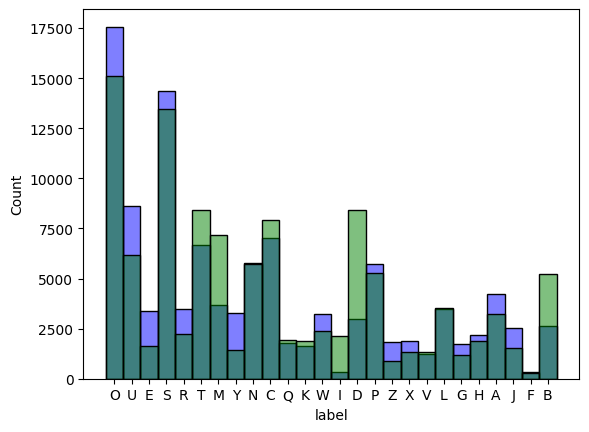

In [109]:
sns.histplot(y_test,color='blue',alpha=0.5)
sns.histplot(y_pred_abc,color='green',alpha=0.5)

In [72]:
print(classification_report(y_test,y_pred_abc))

              precision    recall  f1-score   support

           A       0.44      0.33      0.38      4204
           B       0.25      0.49      0.33      2656
           C       0.57      0.64      0.60      7048
           D       0.21      0.60      0.32      3005
           E       0.52      0.25      0.34      3402
           F       0.75      0.60      0.67       351
           G       0.24      0.16      0.20      1737
           H       0.25      0.22      0.24      2172
           I       0.15      0.88      0.25       350
           J       0.39      0.23      0.29      2538
           K       0.44      0.51      0.48      1650
           L       0.69      0.71      0.70      3459
           M       0.40      0.77      0.53      3694
           N       0.40      0.40      0.40      5760
           O       0.74      0.64      0.69     17569
           P       0.78      0.72      0.75      5744
           Q       0.36      0.38      0.37      1794
           R       0.58    

In [75]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train,y_train)

GaussianNB()

In [76]:
y_pred_gnb=GNB.predict(X_test)
y_pred_gnb

array(['O', 'O', 'S', ..., 'O', 'P', 'S'], dtype='<U1')

In [77]:
accuracy_score(y_test,y_pred_gnb)

0.5666302713539056

<AxesSubplot:xlabel='label', ylabel='Count'>

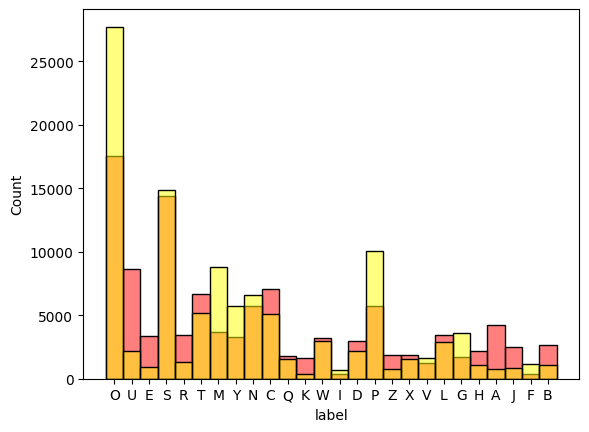

In [122]:
sns.histplot(y_test,color='red',alpha=0.5)
sns.histplot(y_pred_gnb,color='yellow',alpha=0.5)

In [78]:
print(classification_report(y_test,y_pred_gnb))

              precision    recall  f1-score   support

           A       0.63      0.11      0.19      4204
           B       0.49      0.20      0.29      2656
           C       0.78      0.56      0.65      7048
           D       0.56      0.40      0.47      3005
           E       0.60      0.17      0.26      3402
           F       0.26      0.89      0.41       351
           G       0.29      0.60      0.39      1737
           H       0.43      0.21      0.28      2172
           I       0.41      0.80      0.54       350
           J       0.54      0.19      0.28      2538
           K       0.42      0.10      0.16      1650
           L       0.72      0.61      0.66      3459
           M       0.38      0.90      0.53      3694
           N       0.47      0.53      0.50      5760
           O       0.57      0.90      0.70     17569
           P       0.51      0.90      0.65      5744
           Q       0.51      0.44      0.48      1794
           R       0.75    

In [80]:
model=[("Logistic Regression",accuracy_score(y_test,y_pred_logistic)),("KNN Classification",accuracy_score(y_test,y_pred_knc)),
       ("Decision Tree Classification",accuracy_score(y_test,y_pred_dt)),("GaussianNB Classification",accuracy_score(y_test,y_pred_gnb)),
       ("Random Forest Classification",accuracy_score(y_test,y_pred_rfc)),("Ada Boost Classification",accuracy_score(y_test,y_pred_abc))]

In [81]:
predict=pd.DataFrame(data=model,columns=["Algorithm","Accuracy_Score"],index=[1,2,3,4,5,6])
predict.sort_values(by='Accuracy_Score',ascending=False)

,Algorithm,Accuracy_Score
5,Random Forest Classification,0.981564
2,KNN Classification,0.964935
3,Decision Tree Classification,0.945165
1,Logistic Regression,0.851051
4,GaussianNB Classification,0.566630
6,Ada Boost Classification,0.530903


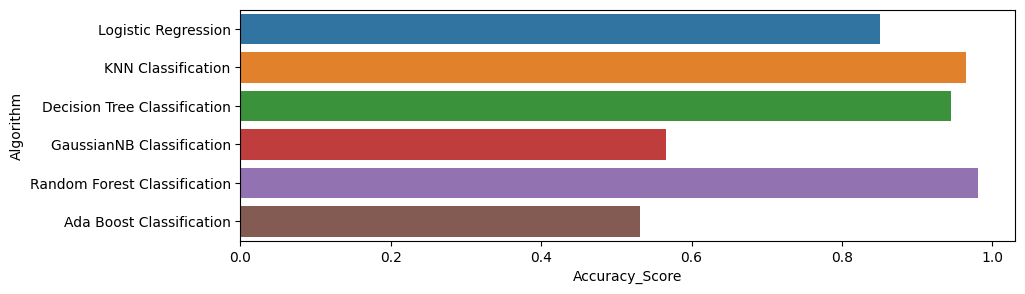

In [103]:
plt.figure(figsize=(10,3))
sns.barplot(x=predict['Accuracy_Score'],y=predict['Algorithm'])
plt.show()
